In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix

In [64]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Billionaires Statistics Dataset - ML.csv')
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [65]:
#Filter and visualize the status distribution of billionaires using a pie chart.
status_to_remove = ['E', 'N', 'Split Family Fortune', 'R']

df = df[~df['status'].isin(status_to_remove)]
df.reset_index(drop=True, inplace=True)

In [66]:
df['status'].value_counts()

D    1223
U     855
Name: status, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2078 non-null   int64  
 1   finalWorth                                  2078 non-null   int64  
 2   category                                    2078 non-null   object 
 3   personName                                  2078 non-null   object 
 4   age                                         2044 non-null   float64
 5   country                                     2070 non-null   object 
 6   city                                        2051 non-null   object 
 7   source                                      2078 non-null   object 
 8   industries                                  2078 non-null   object 
 9   countryOfCitizenship                        2078 non-null   object 
 10  organization

In [68]:
myLabel = LabelEncoder()
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = myLabel.fit_transform(df[column])
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,4,172,74.0,22,419,387,4,20,...,1.1,19,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,0,459,51.0,68,21,696,0,66,...,7.5,23,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,16,787,59.0,68,337,28,16,66,...,7.5,23,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,16,1014,78.0,68,278,508,16,66,...,7.5,23,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,5,1866,92.0,68,404,76,5,66,...,7.5,23,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [69]:
df.isnull().sum()

rank                                            0
finalWorth                                      0
category                                        0
personName                                      0
age                                            34
country                                         0
city                                            0
source                                          0
industries                                      0
countryOfCitizenship                            0
organization                                    0
selfMade                                        0
status                                          0
gender                                          0
birthDate                                       0
lastName                                        0
firstName                                       0
title                                           0
date                                            0
state                                           0


In [70]:
df = df.fillna(df.mean())

In [71]:
y = df['finalWorth'].values
X = df[['age']].values

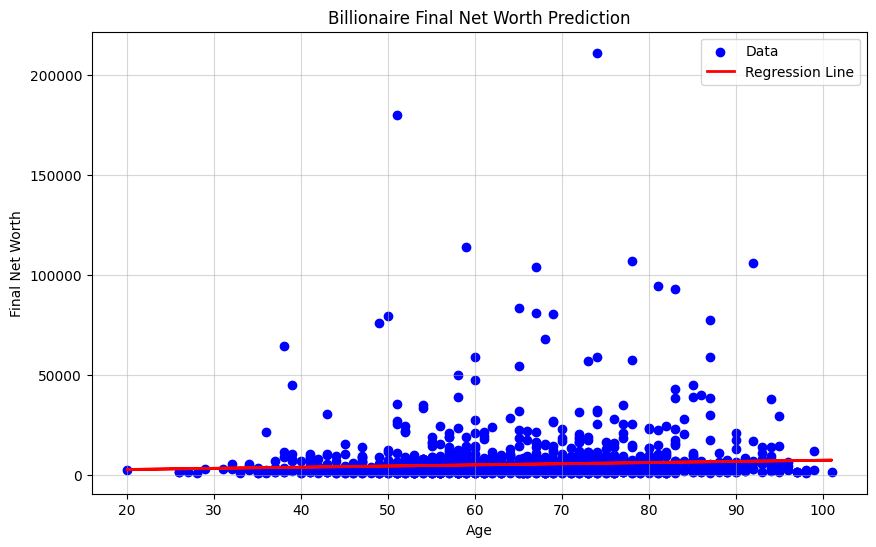

In [72]:
 # Select the features (X) and the target (y)
X = df[['age']]
y = df['finalWorth']

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Final Net Worth')
plt.title('Billionaire Final Net Worth Prediction')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()


In [73]:
df1 = pd.get_dummies(df['country']).astype(int)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [74]:
df = pd.concat([df, df1], axis=1)
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,63,64,65,66,67,68,69,70,71,72
0,1,211000,4,172,74.0,22,419,387,4,20,...,0,0,0,0,0,0,0,0,0,0
1,2,180000,0,459,51.0,68,21,696,0,66,...,0,0,0,0,0,1,0,0,0,0
2,3,114000,16,787,59.0,68,337,28,16,66,...,0,0,0,0,0,1,0,0,0,0
3,4,107000,16,1014,78.0,68,278,508,16,66,...,0,0,0,0,0,1,0,0,0,0
4,5,106000,5,1866,92.0,68,404,76,5,66,...,0,0,0,0,0,1,0,0,0,0


In [75]:
X = df[['age', 'country', 'cpi_country', 'cpi_change_country', 'gross_tertiary_education_enrollment',
        'gross_primary_education_enrollment_country', 'tax_revenue_country_country', 'gdp_country',
        'life_expectancy_country', 'total_tax_rate_country', 'city']].values
y = df['selfMade'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# Scale the features using MinMaxScaler
myscaler = MinMaxScaler()
X_train = myscaler.fit_transform(X_train)
X_test = myscaler.transform(X_test)

# Create a logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, C=100)  # Adjust solver and max_iter if needed

# Create the RFE model with the desired number of features to select
num_features_to_select = 3
rfe = RFE(estimator=logreg, n_features_to_select=num_features_to_select)
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Train the logistic regression model on the selected features
logreg.fit(X_train_selected, y_train)

# Make predictions and calculate accuracy on the test set
y_pred = logreg.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform cross-validation and calculate accuracy
cv_scores = cross_val_score(logreg, X_train_selected, y_train, cv=8)  # You can adjust the number of folds (cv) as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Accuracy: 0.7139423076923077
Cross-Validation Scores: [0.69230769 0.6875     0.71153846 0.69711538 0.73557692 0.72596154
 0.68599034 0.6763285 ]
Mean Accuracy: 0.7015398550724637


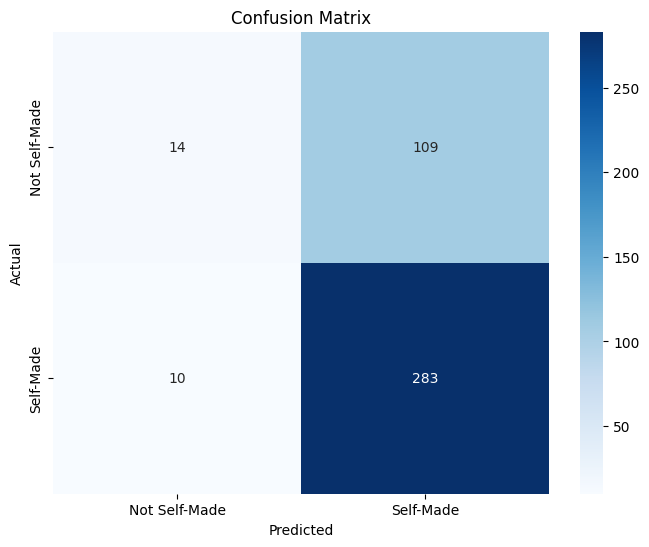

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define the class labels (if you have a binary classification)
class_labels = ["Not Self-Made", "Self-Made"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

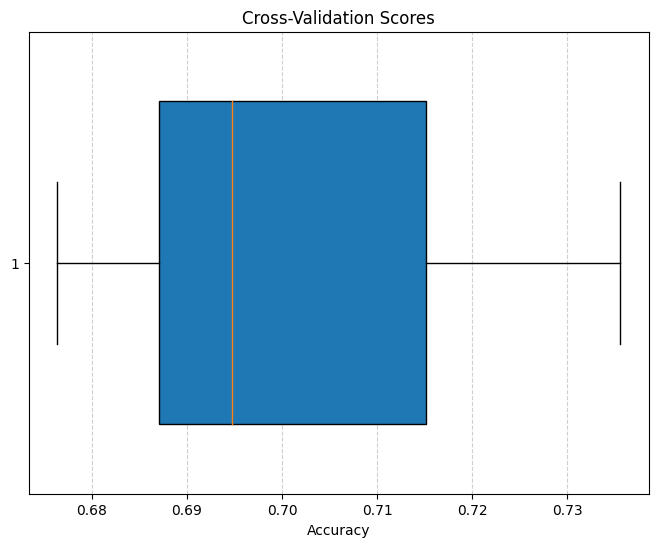

In [77]:
# Create a box plot of cross-validation scores
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores, vert=False, widths=0.7, patch_artist=True)
plt.xlabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

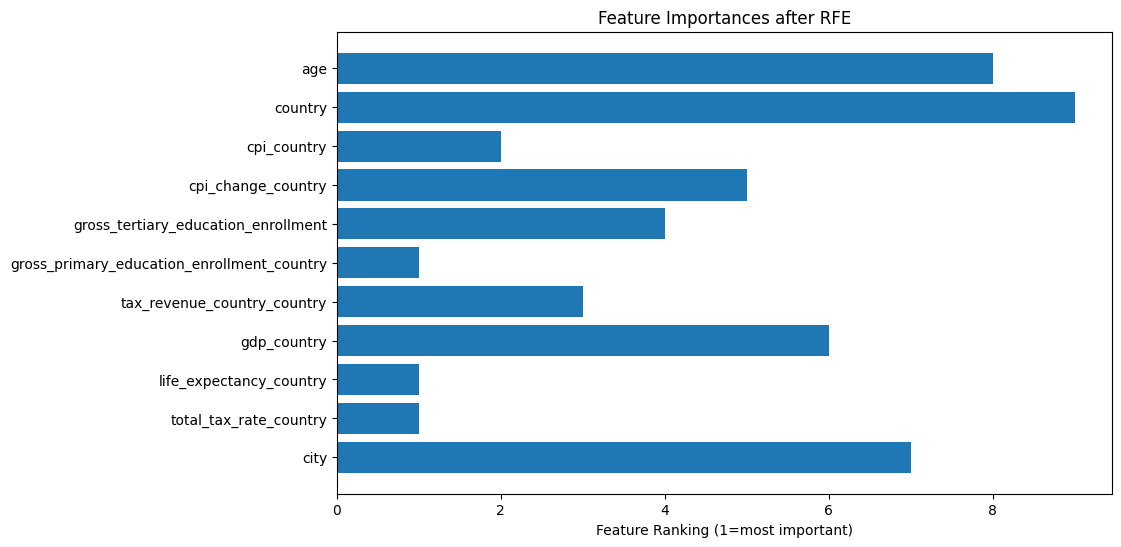

In [78]:
# Fit the RFE model on the entire training dataset to get feature rankings
rfe.fit(X_train, y_train)

# Get the feature rankings and support (whether the feature was selected)
feature_rankings = rfe.ranking_
selected_features = rfe.support_

# Create a list of feature names
feature_names = ['age', 'country', 'cpi_country', 'cpi_change_country', 'gross_tertiary_education_enrollment',
                 'gross_primary_education_enrollment_country', 'tax_revenue_country_country', 'gdp_country',
                 'life_expectancy_country', 'total_tax_rate_country', 'city']

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_rankings)), feature_rankings)
plt.yticks(range(len(feature_rankings)), [feature_names[i] for i in range(len(feature_rankings))])  # Fix the syntax error here
plt.xlabel("Feature Ranking (1=most important)")
plt.title("Feature Importances after RFE")
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


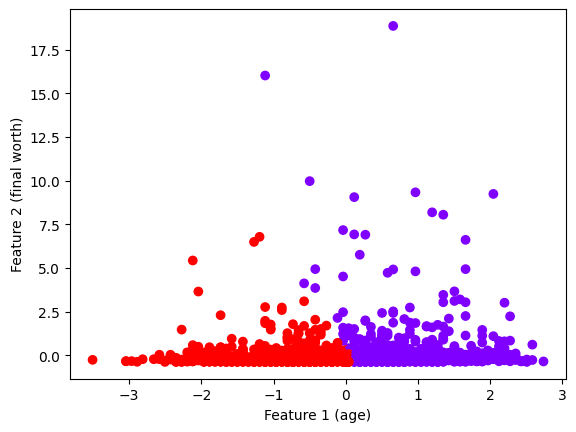

In [79]:

# Feature selection and scaling
selected_features = df[['age', 'finalWorth']]
scaler = StandardScaler()
X = scaler.fit_transform(selected_features)

# Choose the number of clusters (K)
k = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Add cluster labels to your dataset
df['cluster'] = kmeans.labels_

# Visualize the clusters (e.g., using the first two features)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Feature 1 (age)')
plt.ylabel('Feature 2 (final worth)')
plt.show()
